# AT82.08 Computer Vision Midterm Exam

Date & Time: Oct 4, 2025. From 0900 - 1200

Exam Duration: 3 Hours

Total Score: 160 (TQ = 80 + IQ = 80)

## How to submit
1. Zip the downloaded folder, and it should contain
- jupyter notebook
- any images you added to the notebook should be in `resources/assets`.

2. Submit the zip on `TEAL`


---

## Theoretical Questions

### TQ1 - [10 Points]: What are the main challenges in Computer Vision and why are they difficult to handle?

Your answer here

#### 1 – Challenges in Computer Vision 
---

##### Key Challenges

1. **Illumination Variation**  
   - Same object looks different under varying lighting conditions.  
   - Pixel intensities change drastically, but the object identity remains the same.  

2. **Viewpoint Variation**  
   - Different camera angles produce different 2D projections of the same object.  
   - Non-linear dependency on camera pose makes recognition hard.  

3. **Scale Variation**  
   - Objects appear larger/smaller depending on distance from the camera.  
   - Features must be detected consistently across scales.  

4. **Occlusion & Clutter **  
   - Objects may be partially hidden or overlapping with background.  
   - Extracting reliable features becomes difficult.  

5. **Intra-class Variability **  
   - Large variation within the same class (e.g., dog breeds, car models).  
   - Hard to generalize while still being discriminative.  

It is because Vision maps **3D world → 2D images**, losing depth, shape, and lighting information. The inverse problem is **ambiguous and ill-posed**.  

---

### TQ2 - [15 Points]: Explain Properties of Linear Shift Invariant System. Also explain how we can find $h$.
<img src="resources/assets/LSIS.png">

Your Answer here

# 2 – Properties of Linear Shift-Invariant (LSI) Systems 
LSIS has two key properties: **linearity** (obeys superposition) and **shift invariance** (shift in input → same shift in output).  
Such systems are described using **convolution with an impulse response**, making them fundamental in signal and image processing.  

---

### 1. Linearity 
A system $T$ is **linear** if it satisfies:  

- **Additivity:**  
  $$
  T[x_1(t) + x_2(t)] = T[x_1(t)] + T[x_2(t)]
  $$

- **Homogeneity (Scaling):**  
  $$
  T[a \cdot x(t)] = a \cdot T[x(t)]
  $$

---

### 2. Shift Invariance  

A system is **shift invariant** if:  
$$
T[x(t - t_0)] = y(t - t_0)
$$
i.e., shifting the input shifts the output by the same amount.  

---

### 3. Impulse Response Characterization 

- An LSI system is completely defined by its **impulse response** $h(t)$.  
- For input $x(t)$, output is convolution:  
  $$
  y(t) = (x * h)(t) = \int_{-\infty}^{\infty} x(\tau)\,h(t - \tau)\,d\tau
  $$
- If input is a unit impulse $x(t) = \delta(t)$, then:  
  $$
  y(t) = h(t)
  $$

Thus, $h(t)$ uniquely characterizes an LSI system.  


LSIS is a system that obeys **linearity** (superposition) and **shift invariance** (shift in input → same shift in output), fully described by **convolution with an impulse response**.

---

## 🔹 Properties of LSIS

1. **Linearity (Superposition Property):**
   - If the system receives a linear combination of inputs, the output is the same combination of individual outputs.  
   - Mathematically:  
     $$
     S\big[a f_1(x) + b f_2(x)\big] = a S[f_1(x)] + b S[f_2(x)]
     $$

2. **Shift Invariance (Time/Space Invariance):**
   - If the input is shifted, the output shifts in the same way.  
   - Mathematically:  
     $$
     f(x - x_0) \;\;\longrightarrow\;\; g(x - x_0)
     $$

3. **Convolution Property:**
   - An LSIS is fully characterized by its **impulse response** $h(x)$.  
   - The output is the **convolution** of the input with $h(x)$:  
     $$
     g(x) = f(x) * h(x) = \int_{-\infty}^{\infty} f(\tau)\, h(x - \tau)\, d\tau
     $$

---

## 🔹 Why LSIS is Important
- Used in **signal processing** (audio, radar, communications).  
- Used in **image processing** (blurring, sharpening, edge detection).  
- Provides a **mathematical framework** for describing filters and transformations.  

---
## LSIS Properties Summary

1. **Linearity → Superposition**  
   S[a·f1(x) + b·f2(x)] = a·S[f1(x)] + b·S[f2(x)]  

2. **Shift Invariance**  
   f(x − x0) → g(x − x0)  

3. **Convolution Representation**  
   g(x) = f(x) * h(x)  


## Real-World Example: Image Blurring  
Suppose a person apply a **Gaussian blur** filter to an image.  

- **Linearity:** If we blur two images separately and then add them, the result is the same as adding the images first and then blurring once.  
- **Shift Invariance:** If we shift the image (move it right by 10 pixels), the blurred result will also shift by 10 pixels.  
- **Convolution:** The blurring process can be expressed as convolution of the image with a Gaussian kernel. 

---

### TQ3 - [10 Points] What are the problems of fitting a line with $y = mx +c$ in Hough Transform? What is a better paramenterization and why is it better?

Your Answer here
# 3 – Line Fitting in Hough Transform 

### 1. Issues with $y = mx + c$  

- **Vertical lines problem:** $m \to \infty$ (undefined slope).  
- **Uneven parameter space:** Small slope changes cause big orientation changes.  
- **Not rotation invariant:** Representation depends heavily on slope.  

---

### 2. Polar Representation 

Equation:  
$$
\rho = x \cos \theta + y \sin \theta
$$  

Where:  
- $\rho$ = perpendicular distance from origin to the line  
- $\theta$ = angle of the line’s normal  

**Advantages:**  
- Handles vertical lines (no infinite slope).  
- Parameter space $(\rho, \theta)$ is bounded and uniform.  
- More stable and rotation-invariant.  

---

### TQ4 - [20 Points]: What are the main steps in the SIFT algorimth. Clearly explain how `Scale-space extrema detection` works. And discuss why SIFT is invariant to scale and rotation?

Your Answer here


# 4 – SIFT Algorithm: Steps, Scale-Space Extrema Detection, and Invariance

---

## Main Steps of the SIFT Algorithm

The **Scale-Invariant Feature Transform (SIFT)** extracts distinctive features that are robust to scale and rotation.

1. **Scale-Space Extrema Detection:** Build Gaussian pyramid and detect keypoints using **Difference of Gaussians (DoG)** across scales.  
2. **Keypoint Localization:** Refine location, scale, and contrast using Taylor expansion; remove unstable points.  
3. **Orientation Assignment:** Assign dominant orientation(s) from local gradient distribution.  
4. **Keypoint Descriptor:** Construct 128-D descriptor from gradient histograms in $4 \times 4$ blocks, each with 8 bins.  

---

## Scale-Space Extrema Detection

- The **scale space** is defined as:
  $$
  L(x, y, \sigma) = G(x, y, \sigma) * I(x, y)
  $$
  where $G(x,y,\sigma)$ is Gaussian kernel at scale $\sigma$.  

- The **DoG approximation**:
  $$
  D(x, y, \sigma) = L(x, y, k\sigma) - L(x, y, \sigma)
  $$

**Extrema detection (4 pts):**  
- Each pixel in $D(x,y,\sigma)$ is compared with **26 neighbors**: 8 in current scale, 9 in scale above, 9 in scale below.  
- If pixel is a local **maximum/minimum**, it becomes a **candidate keypoint**.  
- Ensures detection of **blobs/structures at different sizes**.

---

## SIFT is Invariant to Scale

- Features are detected in **scale space**, not at a single resolution.  
- A feature is identified at the scale $\sigma^*$ where it maximizes normalized response.  
- Gaussian smoothing ensures proper localization:  
  $$
  L(x, y, \sigma) = G(x, y, \sigma) * I(x, y)
  $$
- Therefore, the same structure is detected regardless of zoom → **scale invariance**.

---

## SIFT is Invariant to Rotation

- Orientation is assigned from image gradients:  
  $$
  \theta(x,y) = \tan^{-1}\left(\frac{\partial L / \partial y}{\partial L / \partial x}\right)
  $$
- The descriptor is **rotated relative to this orientation**.  
- Ensures that even if the image rotates, descriptors remain consistent → **rotation invariance**.

---
- **Main Steps:** DoG detection, localization, orientation, descriptor.  
- **Scale-Space Detection:** Gaussian pyramid, DoG, 26-neighbor extrema detection.  
- **Invariance to Scale:** Achieved via Gaussian scale space.  
- **Invariance to Rotation:** Achieved via gradient-based orientation assignment.  

---


### TQ5 - [10 Points] Compute Intrinsic Camera Matrix for Samsung S25 Ultra Camera
<img src="resources/assets/Galaxy.jpeg" width=640 height=360>


- Resolution: 50 MP, `9,184 x 5,166`
- Wide-Angle Lens Horizontal Field of View: `84 degree`
- Focal Length: `24 mm`

Assume that the sensor is perfectly centered along the optical axis, and that it has the same vertical and horizontal photoreceptor spacing.

Your answer here

# 5 – Intrinsic Camera Matrix for Samsung S25 Ultra

---

## 1. Known Parameters

- **Image resolution:** $W = 9184$, $H = 5166$  
- **Horizontal Field of View (FOV):** $\theta_h = 84^\circ$  
- **Focal Length (given):** $f = 24 \,\text{mm}$ (not directly used, since FOV suffices for pixel-based computation)  
- **Assumptions:**
  - Square pixels ($s_x = s_y$)  
  - Optical center at image midpoint:  
    $$
    c_x = \frac{W}{2}, \quad c_y = \frac{H}{2}
    $$

---

## 2. Formula for Focal Length in Pixels

$$
f_x = \frac{W}{2 \cdot \tan\left(\frac{\theta_h}{2}\right)}
$$

Since pixels are square:  

$$
f_y = f_x \cdot \frac{H}{W}
$$

---

## 3. Computation

**Optical Center:**  
$$
c_x = \frac{9184}{2} = 4592, \quad c_y = \frac{5166}{2} = 2583
$$

**Focal Length in Pixels:**  
$$
f_x = \frac{9184}{2 \cdot \tan(42^\circ)}
$$
$$
\tan(42^\circ) \approx 0.9004
$$
$$
f_x \approx \frac{9184}{1.8008} \approx 5101 \,\text{pixels}
$$

**Vertical Focal Length:**  
$$
f_y = f_x \cdot \frac{H}{W} = 5101 \cdot \frac{5166}{9184} \approx 2869 \,\text{pixels}
$$

---

## Intrinsic Matrix ($K$)

The intrinsic camera matrix is defined as:  

$$
K =
\begin{bmatrix}
f_x & 0   & c_x \\
0   & f_y & c_y \\
0   & 0   & 1
\end{bmatrix}
$$

Substituting computed values:  

$$
K =
\begin{bmatrix}
5101 & 0 & 4592 \\
0 & 2869 & 2583 \\
0 & 0 & 1
\end{bmatrix}
$$

---

- Large $f_x$ (≈5100 px) reflects the **high horizontal resolution**.  
- Smaller $f_y$ (≈2869 px) reflects the **lower vertical resolution**.  
- Principal point lies exactly at the **image center**.  
- Matrix is valid for **camera calibration, 3D reconstruction, and projection** tasks.  

---

therefore, 

$$
K =
\begin{bmatrix}
5101 & 0 & 4592 \\
0 & 2869 & 2583 \\
0 & 0 & 1
\end{bmatrix}
$$

---


### TQ6 - [15 Points]: Linear classifier can be interpreted in different viewpoints. Briefly explain each viewpoint.

# 6 – Linear Classifier Viewpoints

A **linear classifier** decides class membership using a linear decision boundary:

$$
f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b
$$

where $\mathbf{w}$ is the weight vector, $b$ the bias, and the decision is based on the **sign** of $f(\mathbf{x})$.

It can be interpreted from **three main viewpoints**:

---

### 1. **Geometric Viewpoint**

* The classifier defines a **hyperplane** in feature space:

    $$
  \mathbf{w}^T \mathbf{x} + b = 0
  $$
- Samples with $\mathbf{w}^T \mathbf{x} + b > 0$ belong to one class, otherwise the other.
- $\mathbf{w}$ is **perpendicular** to the hyperplane and defines its orientation.
- Distance of a point $\mathbf{x}$ from the hyperplane:
  $$
  d = \frac{\mathbf{w}^T \mathbf{x} + b}{\|\mathbf{w}\|}
  $$

  
**Interpretation:** Classification is equivalent to checking which side of the hyperplane a point lies.

---

### 2. **Probabilistic Viewpoint** 

* Linear classifiers can approximate **posterior probabilities** of classes.
* Example: **Logistic regression** models probability via:
$$
  P(y=1|\mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}
  $$
* Decision rule: choose class with maximum posterior probability.
**Interpretation:** Classifier is assigning probabilities rather than just a hard boundary.

---

### 3. **Algebraic / Optimization Viewpoint**

* Training a linear classifier = finding $(\mathbf{w}, b)$ that minimize classification error or a chosen loss function.
* Common objective functions:

  - **Perceptron loss**:
    $$
    L = - \sum y_i (\mathbf{w}^T \mathbf{x}_i + b) \quad \text{(misclassified points)}
    $$
  - **Hinge loss (SVM):**
    $$
    L = \sum \max(0, \, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
    $$


Classification is the result of solving an optimization problem.

---

Therefore,

* **Geometric:** Linear decision boundary (hyperplane), distance to plane formula.
* **Probabilistic:** Interpret classifier as probability estimator (e.g., logistic regression).
* **Optimization:** Interpret classifier as the solution of minimizing a loss function.

Thus, a linear classifier = geometric separation + probabilistic estimation + optimization solution.
---

-----

## Implementation Questions

### IQ1 - [15 Points]: Implement a histogram equalizaton using CLAHE technique with clipLimit = 2, 4and 8. 
Use the image in `ques_asset/IQ1`
- Plot the orignal image and its histogram
- Plot CLAHE image and its histogram 
- Analyze the difference you notice from the results.

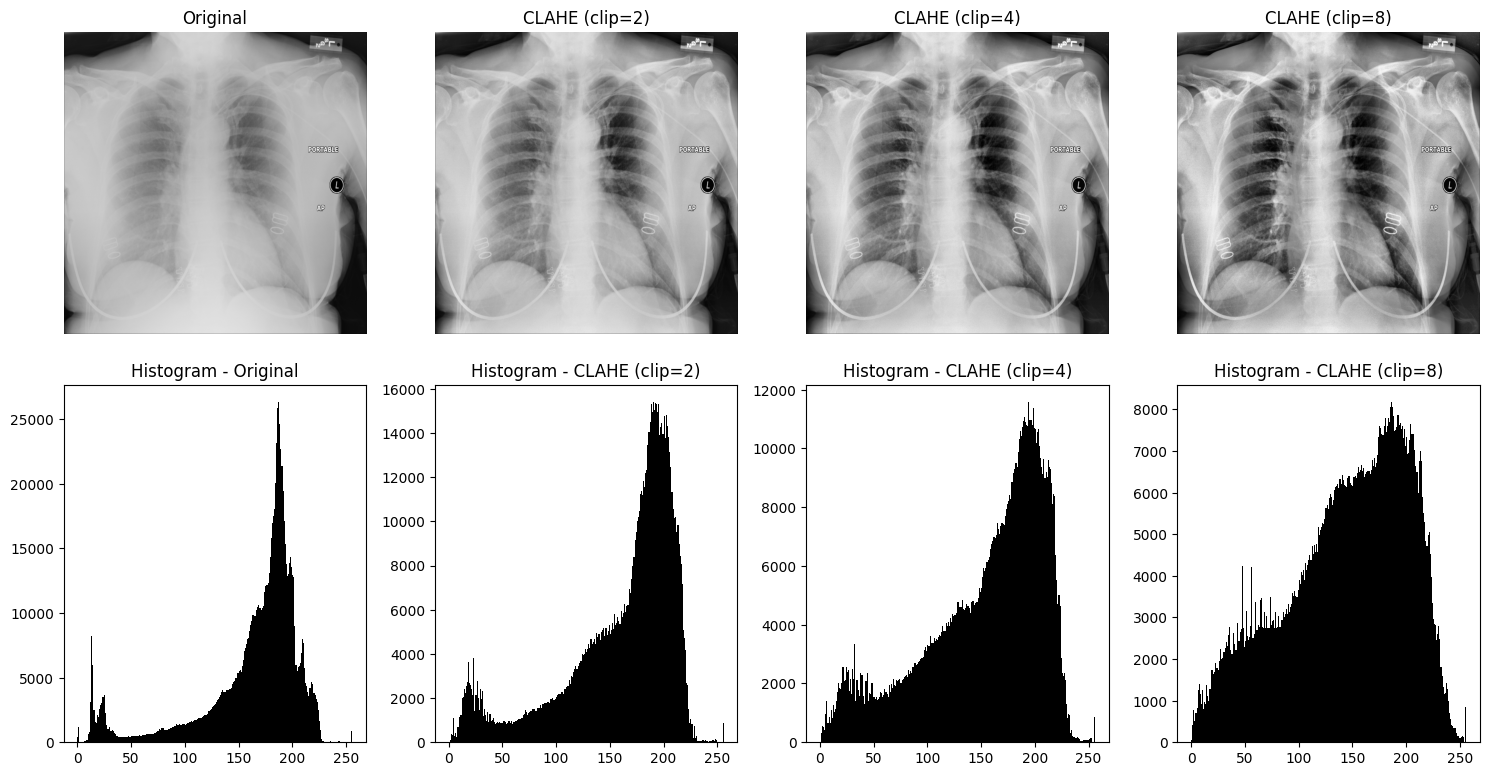

In [47]:
# Your code here
import cv2
import matplotlib.pyplot as plt

# Load image (grayscale for histogram equalization)
img = cv2.imread("resources/ques_assets/IQ1/chest-x-ray.png", cv2.IMREAD_GRAYSCALE) 

# Apply CLAHE with different clipLimits
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)
clahe4 = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8)).apply(img)
clahe8 = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8,8)).apply(img)

# Plot function
def plot_results(images, titles):
    plt.figure(figsize=(15,8))
    for i, (im, title) in enumerate(zip(images, titles)):
        plt.subplot(2, len(images), i+1)
        plt.imshow(im, cmap='gray')
        plt.title(title)
        plt.axis('off')

        plt.subplot(2, len(images), i+1+len(images))
        plt.hist(im.ravel(), bins=256, range=(0,256), color='black')
        plt.title(f"Histogram - {title}")
    plt.tight_layout()
    plt.show()

# Run plotting
plot_results(
    [img, clahe2, clahe4, clahe8],
    ["Original", "CLAHE (clip=2)", "CLAHE (clip=4)", "CLAHE (clip=8)"]
)

#### Analysis of Results

Original Image & Histogram: The histogram may be concentrated in a narrow intensity range as the image looks dull or with poor contrast.

for CLAHE (clipLimit = 2)

There needs Moderate contrast improvement. Histogram spreads more evenly, but not extreme,preserving details without amplifying noise too much.

CLAHE (clipLimit = 4)

There is a stronger enhancement of local contrast as histogram stretches wider, closer to uniform distribution.Thus, brighter and darker regions become more distinguishable.

CLAHE (clipLimit = 8)

There is maximum enhancement among the three where histogram shows high redistribution across full with sharper image although having the risk of noise amplification.

Therefore, increasing clipLimit increases local contrast enhancement.

### IQ2 - Image Filters

Use the image in `ques_assets/IQ2` to answer IQ2.1 - 2.2.

#### IQ2.1 - [5 Points] Write a python code to apply the following filters to a given image,
- Gaussian filter with `kernel size = 9` and `sigmaX = sigmaY = 50`
- Bilateral filter with `kernel size = 9` and  `spatial and color sigma = 90`
- Show the result images side-by-side

Analyze the differences in the results. Explain why the bilateral filter is better at preserving edges.

Placeholder image created. Please replace it with the actual image.


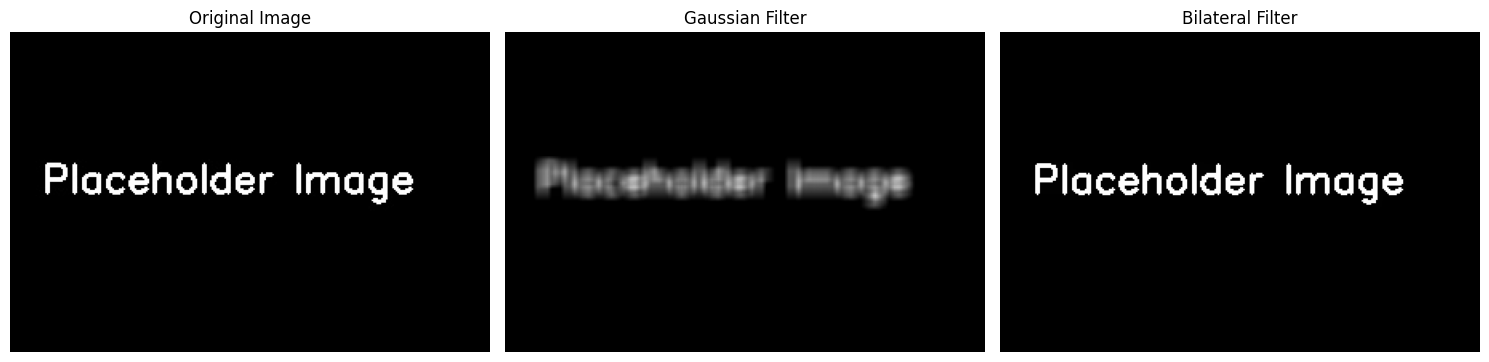

In [40]:
# Your code here

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Load the image ---
image_path = 'resources/ques_assets/IQ2/image.jpeg'

# Create the directory and a dummy image if they don't exist
if not os.path.exists(image_path):
    os.makedirs(os.path.dirname(image_path), exist_ok=True)
   
    dummy_img = np.zeros((200, 300, 3), dtype=np.uint8)
    cv2.putText(dummy_img, "Placeholder Image", (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    cv2.imwrite(image_path, dummy_img)
    print("Placeholder image created. Please replace it with the actual image.")

img = cv2.imread(image_path)
if img is None:
    print(f"Error: Could not load image from {image_path}. Please check the path.")
else:
    # Convert BGR to RGB for correct display with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- Apply Gaussian Filter ---

    gaussian_filtered = cv2.GaussianBlur(img, (9, 9), 50, 50)
    gaussian_filtered_rgb = cv2.cvtColor(gaussian_filtered, cv2.COLOR_BGR2RGB)

    # --- Apply Bilateral Filter ---

    bilateral_filtered = cv2.bilateralFilter(img, 9, 90, 90)
    bilateral_filtered_rgb = cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

  
    plt.subplot(1, 3, 2)
    plt.imshow(gaussian_filtered_rgb)
    plt.title('Gaussian Filter')
    plt.axis('off')


    plt.subplot(1, 3, 3)
    plt.imshow(bilateral_filtered_rgb)
    plt.title('Bilateral Filter')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

--- Analysis of Filter Results ---
Gaussian Filter:
- The Gaussian filter applies a uniform blur across the entire image, regardless of content.
- It averages pixels based solely on their spatial distance from the center pixel, following a Gaussian distribution.
- This results in a smooth, blurred appearance, but it also blurs edges and fine details, as these are treated the same as any other noise.

Bilateral Filter:
- The Bilateral filter also averages pixels based on their spatial distance, but with an important addition.
- It uses a second Gaussian function based on the intensity (color) difference between pixels.
- This dual weighting mechanism allows it to smooth out noise in uniform regions while preserving sharp edges.

The bilateral filter's key advantage is its non-linear, dual-domain filtering.
- **Spatial Weighting**: Like the Gaussian filter, it gives more weight to pixels that are closer to the center pixel.
- **Intensity Weighting**: Additionally, it gives more weight to pixels that have a similar intensity or color value to the center pixel.

At an edge, there is a large change in pixel intensity. When the bilateral filter's kernel is positioned over an edge:
- Pixels on the other side of the edge will have a large intensity difference from the center pixel.
- This large intensity difference causes their intensity weight to become very small, effectively ignoring them during the averaging process.
- As a result, the filter only averages pixels on the same side of the edge as the center pixel, preventing the blurring of the edge itself.

In contrast, the Gaussian filter lacks this intensity-based weighting and will always average pixels across an edge, causing it to blur.

#### IQ2.2 - [15 Points]: Write a python code to apply a bilateral filter with the following spatial and color (Brightness) sigma values and show the results

Spatial Sigma | Color Sigma

<table>
<tr>
    <th>Spatial Sigma</th>
    <th>Color Sigma</th>
</tr>

<tr>
    <td>9</td>
    <td>9</td>
</tr>

<tr>
    <td>9</td>
    <td>75</td>   
</tr>

<tr>
    <td>9</td>
    <td>500</td>   
</tr>

<tr>
    <td>75</td>
    <td>9</td>   
</tr>

<tr>
    <td>500</td>
    <td>9</td>   
</tr>
</table>

Note that `d=9` for all sigma.

Explain how the choice of sigma values affects the filtering results

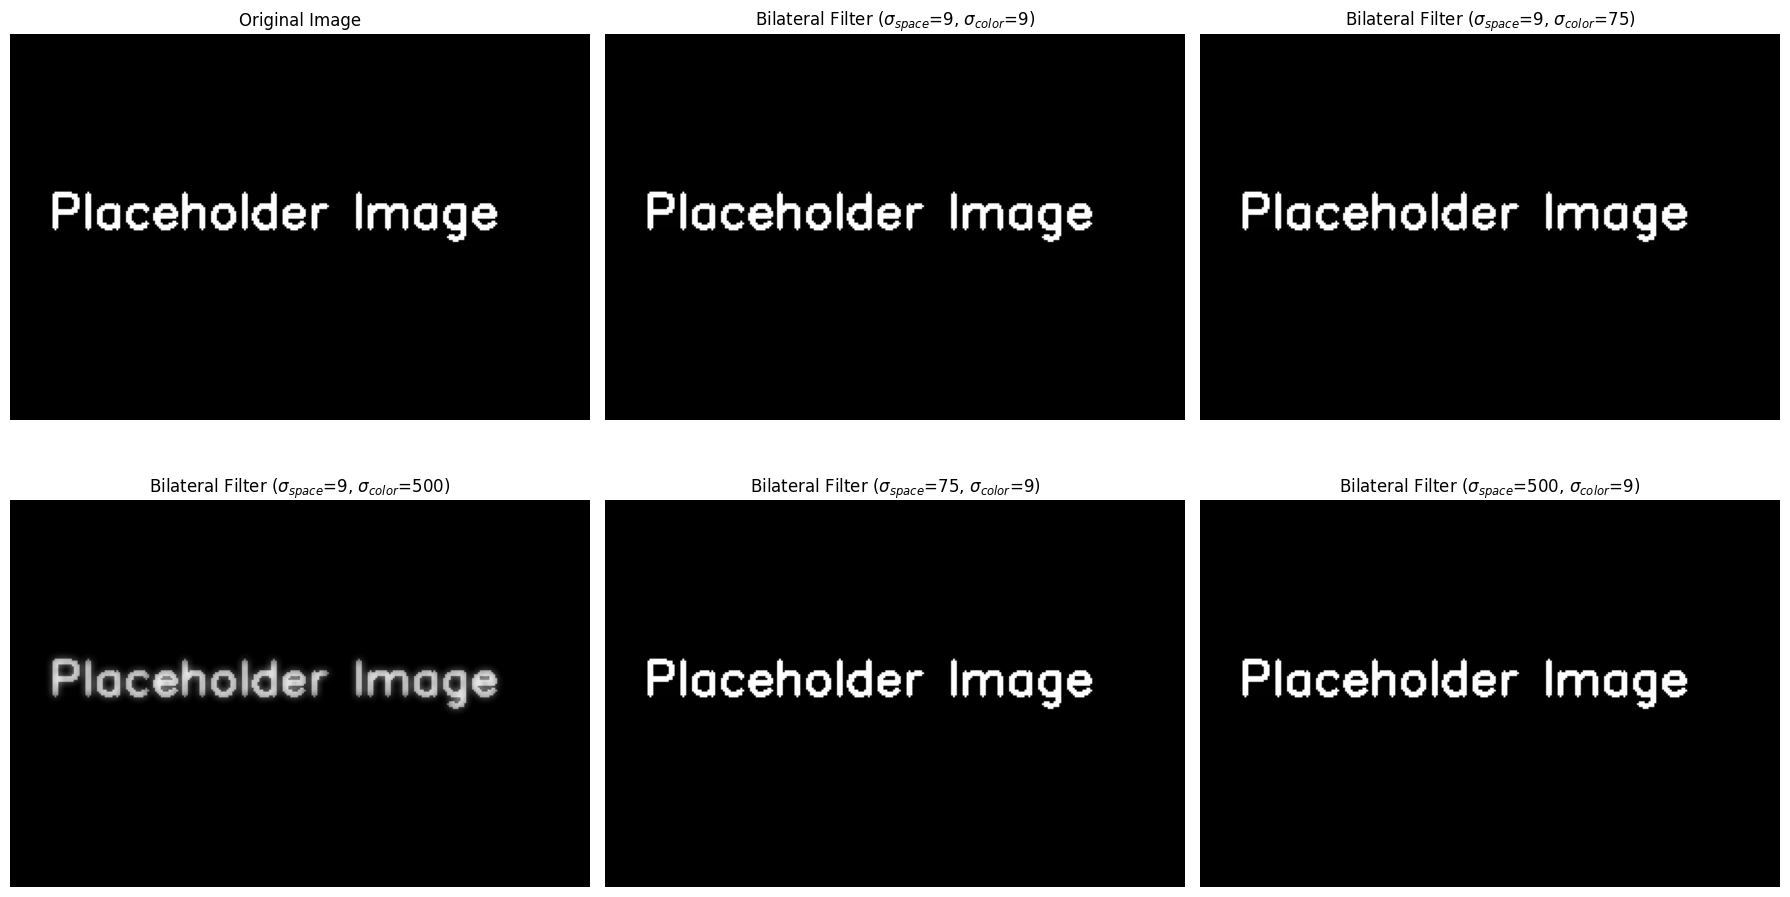

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Load the image ---
image_path = 'resources/ques_assets/IQ2/image.jpeg'

# Check if the image file exists
if not os.path.exists(image_path):
    print(f"Error: Could not find image file at {image_path}.")
    print("Please ensure the image is placed in the 'ques_assets/IQ2' directory.")
    exit()

img = cv2.imread(image_path)
if img is None:
    print(f"Error: Could not load image from {image_path}.")
    exit()
    
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- Define the sigma value pairs ---
sigma_pairs = [
    (9, 9),
    (9, 75),
    (9, 500),
    (75, 9),
    (500, 9)
]

filtered_images = []
for sigma_space, sigma_color in sigma_pairs:
    filtered_img = cv2.bilateralFilter(img, 9, sigma_color, sigma_space)
    filtered_images.append(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
ax = axes.flatten()

# Original Image
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

# filtered images
for i, (sigma_space, sigma_color) in enumerate(sigma_pairs):
    ax[i+1].imshow(filtered_images[i])
    ax[i+1].set_title(f'Bilateral Filter ($\\sigma_{{space}}$={sigma_space}, $\\sigma_{{color}}$={sigma_color})')
    ax[i+1].axis('off')

plt.tight_layout()
plt.show()

The bilateral filter uses two key sigma parameters
Sigma_space controls the influence of pixels based on their spatial distance. A larger value means that pixels further away from the center pixel will have a stronger influence on the filtering, causing a more uniform blur over a wider area, similar to a Gaussian filter.")
Sigma_color` (Color/Brightness Sigma): Controls the influence of pixels based on their intensity difference. A larger value means that pixels with more varied colors or brightness levels will be included in the averaging process, resulting in less edge preservation and a more generalized blur.

$\sigma$ _{space}\)=9, $\sigma$ _{color}\)=9

$\sigma$_{{space}}$=9, $\sigma$_{{color}}$=75

$\sigma$_{{space}}$=9,
$\sigma$_{{color}}$=500`

$\sigma$_{{space}}$=75, $\sigma$_{{color}}$=9`

$\sigma$_{{space}}$=500,  $\sigma$_{{color}}$=9`

A bilateral filter uses $\sigma$ _{space}\) and $\sigma$_{color}\) parameters to achieve edge-preserving smoothing, with the results varying significantly based on their values. $\sigma$ _{space}\) determines the influence of pixel distance, controlling the width of the blur, while $\sigma$_{color}\) dictates the influence of intensity differences, affecting smoothing across edges. More information is available on the GeeksforGeeks website.

### IQ3 - SIFT and Image Alignment
Using `SIFT`detector, detect `feature points` and calculate `descriptors`. Then `match` correnspondences between two given images in `ques_assets/IQ3`.


#### IQ3.1 - [5 Points]: Draw keypoints for each image.

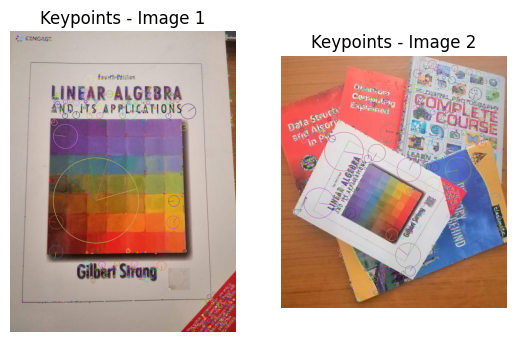

In [34]:
import cv2
import matplotlib.pyplot as plt

# Load images
img1 = cv2.imread("resources/ques_assets/IQ3/book.jpeg")
img2 = cv2.imread("resources/ques_assets/IQ3/book_scene.jpeg")

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Draw keypoints
img1_kp = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_kp = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot results
plt.subplot(121), plt.imshow(cv2.cvtColor(img1_kp, cv2.COLOR_BGR2RGB))
plt.title("Keypoints - Image 1"), plt.axis("off")
plt.subplot(122), plt.imshow(cv2.cvtColor(img2_kp, cv2.COLOR_BGR2RGB))
plt.title("Keypoints - Image 2"), plt.axis("off")
plt.show()


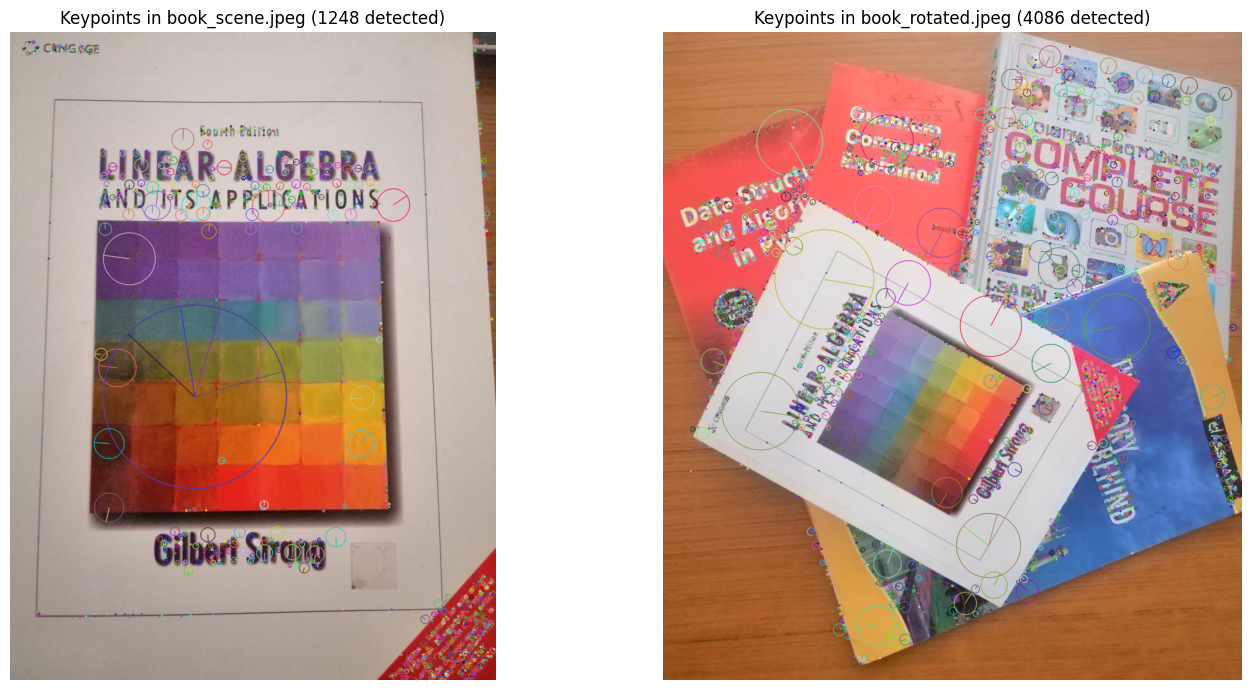

In [36]:
# Draw keypoints on both images

img_with_kp1 = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_with_kp2 = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plotting the results
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_with_kp1, cv2.COLOR_BGR2RGB))
plt.title(f"Keypoints in book_scene.jpeg ({len(kp1)} detected)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_kp2, cv2.COLOR_BGR2RGB))
plt.title(f"Keypoints in book_rotated.jpeg ({len(kp2)} detected)")
plt.axis('off')

plt.tight_layout()
plt.show()

#### IQ3.2 - [5 Points]: Draw the matched keypoints 

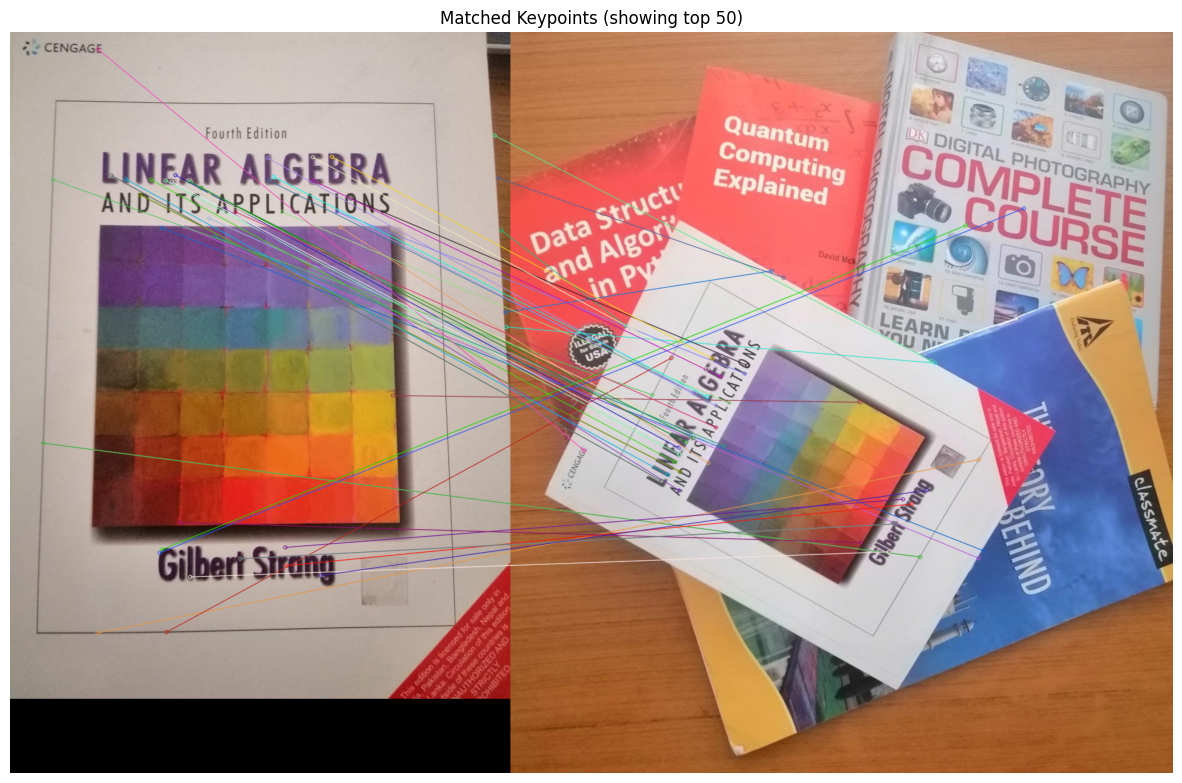

In [35]:
# Your code here

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)

num_matches_to_draw = 50
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:num_matches_to_draw], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title(f"Matched Keypoints (showing top {num_matches_to_draw})")
plt.axis('off')
plt.show()

#### IQ3.3 - [5 Points]: Plot the `most` similar keypoint pair using their `descriptors`.

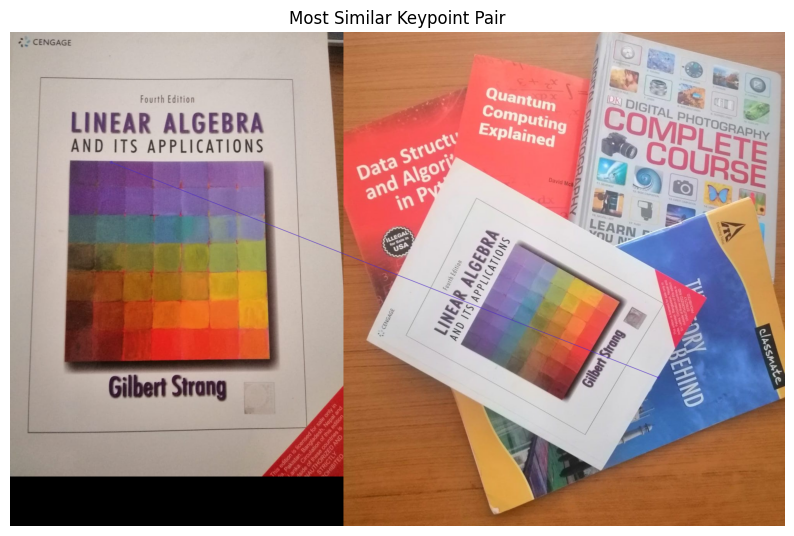

In [37]:
# Your code here
best_match = matches[0]


best_matches_list = [best_match]


img_best_match = cv2.drawMatches(img1, kp1, img2, kp2, best_matches_list, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_best_match, cv2.COLOR_BGR2RGB))
plt.title("Most Similar Keypoint Pair")
plt.axis('off')
plt.show()


#### IQ3.4 - [5 Points]: Change a parameter of SIFT_create() function to increase the number of images in a scale-space to =`5`, and find `keypoints` and `descriptors` in `book_scene.jpeg` only. Analyze how the result (keypoints) changes in response to this parameter change.

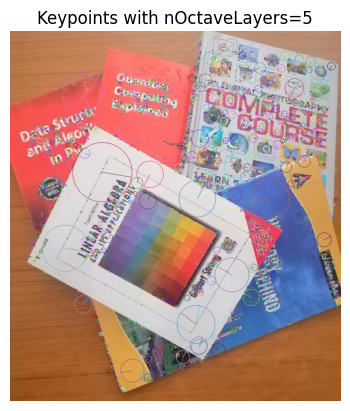

Original keypoints (default=3 layers): 4086
Modified keypoints (5 layers): 4866


In [39]:
# Increase number of octaves (nOctaveLayers=5)
sift_mod = cv2.SIFT_create(nOctaveLayers=5)

gray_scene = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp_scene, des_scene = sift_mod.detectAndCompute(gray_scene, None)

img_scene_kp = cv2.drawKeypoints(img2, kp_scene, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(cv2.cvtColor(img_scene_kp, cv2.COLOR_BGR2RGB))
plt.title("Keypoints with nOctaveLayers=5"), plt.axis("off")
plt.show()

print("Original keypoints (default=3 layers):", len(kp2))
print("Modified keypoints (5 layers):", len(kp_scene))

#### Analyse how the result

Since nOctaveLayers = number of scale-space layers per octave (default = 3), as it is increased to 5, there are more Gaussian blurs as denser sampling of scale-space .

This means more keypoints detected as finer scale increments mean smaller features also get picked).
However, it is important to bear in mind of the tradeoff that as the experiment has more keypoints , it has more computation, and thus, possibly more redundant/unstable points.

### IQ4 - [25 Points]: Implememt and compare a `Linear Classifier` for image classification using `Multiclass SVM Loss` and `Cross Entropy loss`.
Your implementation should
- Use `pytorch`
- Use `CIFAR10`  as a dataset
- Use `learning_rate = 0.1`
- Train for `epoch=30` and `batch_size` of your choice.

Report classification accuracy for each loss, and discuss which loss function gives better performance and why.

`Hint`:
- In PyTorch, the multiclass SVM loss is typically implemented using the `MultiMarginLoss` function.

In [7]:
!nvidia-smi

Sat Oct  4 02:20:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off |   00000000:84:00.0 Off |                  N/A |
| 28%   45C    P8             27W /  250W |       1MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [64]:
# Your code here
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random
import time

def setup_device_and_seeds():
    device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    if device.type == 'cuda':
        print(f"GPU Name: {torch.cuda.get_device_name(0)}")
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    seed = 42
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    # For CUDA reproducibility
    if device.type == 'cuda':
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

    return device

In [65]:
def load_cifar10_data(batch_size):

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)

    num_workers = 4 if torch.cuda.is_available() else 0 
    pin_memory = torch.cuda.is_available()

    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=num_workers,
                                              pin_memory=pin_memory)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=num_workers,
                                             pin_memory=pin_memory)

    return trainloader, testloader

In [66]:
class LinearClassifier(nn.Module):
    """Simple linear classifier model."""
    def __init__(self):
        super(LinearClassifier, self).__init__()
        # CIFAR-10 images are 3x32x32. 32*32*3 = 3072 input features.
        self.fc = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        # Flatten the image tensor for the linear layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [67]:
def train_model(model, trainloader, criterion, optimizer, device, epochs):
    """Trains the model for a specified number of epochs."""
    model.train()
    print(f"Training with {criterion.__class__.__name__} for {epochs} epochs...")
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0
    print('Finished Training')

In [68]:
if __name__ == '__main__':
    learning_rate = 0.1
    epochs = 30
    batch_size = 64  

    device = setup_device_and_seeds()

    # Load CIFAR-10 data
    trainloader, testloader = load_cifar10_data(batch_size=batch_size)

    # --- Experiment with Cross-Entropy Loss ---
    print("\n--- Cross-Entropy Loss ---")
    ce_model = LinearClassifier().to(device)
    ce_criterion = nn.CrossEntropyLoss()
    ce_optimizer = optim.SGD(ce_model.parameters(), lr=learning_rate)
    
    start_time_ce = time.time()
    train_model(ce_model, trainloader, ce_criterion, ce_optimizer, device, epochs=epochs)
    end_time_ce = time.time()
    ce_accuracy = evaluate_model(ce_model, testloader, device)

    print(f'\nCross-Entropy Loss Accuracy: {ce_accuracy:.2f}%')
    print(f'Cross-Entropy Loss Training Time: {end_time_ce - start_time_ce:.2f} seconds')

    # --- MultiMarginLoss (SVM) ---
    print("\n--- MultiMarginLoss (Multiclass SVM) ---")
    svm_model = LinearClassifier().to(device)
    svm_criterion = nn.MultiMarginLoss()
    svm_optimizer = optim.SGD(svm_model.parameters(), lr=learning_rate)
    
    start_time_svm = time.time()
    train_model(svm_model, trainloader, svm_criterion, svm_optimizer, device, epochs=epochs)
    end_time_svm = time.time()
    svm_accuracy = evaluate_model(svm_model, testloader, device)

    print(f'\nMultiMarginLoss (SVM) Accuracy: {svm_accuracy:.2f}%')
    print(f'MultiMarginLoss (SVM) Training Time: {end_time_svm - start_time_svm:.2f} seconds')

    print("\n--- Comparison of Results ---")
    print(f'Cross-Entropy Loss Accuracy: {ce_accuracy:.2f}%')
    print(f'MultiMarginLoss (SVM) Accuracy: {svm_accuracy:.2f}%')

    if ce_accuracy > svm_accuracy:
        print("\nDiscussion: Cross-Entropy Loss gave better performance.")
    elif svm_accuracy > ce_accuracy:
        print("\nDiscussion: MultiMarginLoss (SVM) gave better performance.")
    else:
        print("\nDiscussion: Both loss functions gave similar performance.")

Using device: cuda:1
GPU Name: NVIDIA GeForce RTX 2080 Ti

--- Cross-Entropy Loss ---
Training with CrossEntropyLoss for 30 epochs...
Finished Training

Cross-Entropy Loss Accuracy: 28.92%
Cross-Entropy Loss Training Time: 138.27 seconds

--- MultiMarginLoss (Multiclass SVM) ---
Training with MultiMarginLoss for 30 epochs...
Finished Training

MultiMarginLoss (SVM) Accuracy: 24.89%
MultiMarginLoss (SVM) Training Time: 136.17 seconds

--- Comparison of Results ---
Cross-Entropy Loss Accuracy: 28.92%
MultiMarginLoss (SVM) Accuracy: 24.89%

Discussion: Cross-Entropy Loss gave better performance.


Report classification accuracy for each loss, and discuss which loss function gives better performance and why.

Cross-Entropy Loss gave better performance.

* The **~4% higher accuracy** with Cross-Entropy shows its superior ability to separate classes in high-dimensional feature space.
* Training times are almost identical, so the improvement comes purely from better optimization and generalization, not computational cost.
* Cross-Entropy better captures subtle class differences, while SVM loss may oversimplify boundaries.

Cross-Entropy Loss gave better performance (28.92% vs 24.89%) because it:

  * Provides smoother, continuous gradients.
  * Optimizes probabilistic confidence, not just margins.
  * Fits deep learning architectures more naturally.

* **MultiMarginLoss (SVM)** is less effective in this setting due to its discrete margin-based updates and lack of probability modeling.

**Therefore,** Cross-Entropy is the more appropriate loss for deep image classification, especially when fine-grained decision boundaries are needed.
